In [64]:
import numpy as np
import pandas as pd
import math

from glob import glob
# import os
%pylab inline

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Выберем регион около Empire State Building: 1231 - 3
test_region = 1231-3

In [3]:
# %%time
# df = pd.DataFrame()
# files = glob('aggr_yellow_tripdata_????-??.bin')
# for fname in files:
#     df_tmp = pd.read_pickle(fname)
#     df = df.append(df_tmp[df_tmp['region'] == test_region])
#     print(fname)
    
# print('finish') 

In [4]:
# df.to_pickle('aggr_yellow_tripdata_w3.bin')
df = pd.read_pickle('aggr_yellow_tripdata_w3.bin')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 483727 to 1858727
Data columns (total 3 columns):
datetime    21167 non-null datetime64[ns, UTC]
region      21167 non-null int64
count       21167 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 661.5 KB


In [6]:
df.head()

,datetime,region,count
483727,2014-01-01 00:00:00+00:00,1228,863.0
906227,2014-01-01 01:00:00+00:00,1228,866.0
486227,2014-01-01 02:00:00+00:00,1228,888.0
908727,2014-01-01 03:00:00+00:00,1228,815.0
911227,2014-01-01 04:00:00+00:00,1228,718.0


In [7]:
dmin, dmax = df.datetime.min(), df.datetime.max()
print('Рассматриваемый интервал: {:%d.%m.%Y %H:%M} - {:%d.%m.%Y %H:%M}'.format(dmin, dmax))
print('расчетное количество часов в интервале: {:n}'.format( (dmax - dmin).total_seconds() / 3600 ))
print('Количество записей в DataFrame        : {:n}'.format(len(df)))

Рассматриваемый интервал: 01.01.2014 00:00 - 31.05.2016 23:00
расчетное количество часов в интервале: 21167
Количество записей в DataFrame        : 21167


In [44]:
df_plot = df.set_index('datetime')

In [45]:
# df_plot.resample('M').mean().head

In [49]:
# Индекс имеет тип DatetimeIndex, а у класса DatetimeIndex есть переменная-член date
# Вырезаем данные за год.
s = df_plot.loc[(df_plot.index.date >= datetime.date(2015, 5, 1)) & 
                (df_plot.index.date < datetime.date(2016, 5, 1))]

In [50]:
s.head()

,region,count
datetime,,
2015-05-01 00:00:00+00:00,1228,677.0
2015-05-01 01:00:00+00:00,1228,452.0
2015-05-01 02:00:00+00:00,1228,338.0
2015-05-01 03:00:00+00:00,1228,224.0
2015-05-01 04:00:00+00:00,1228,217.0


C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


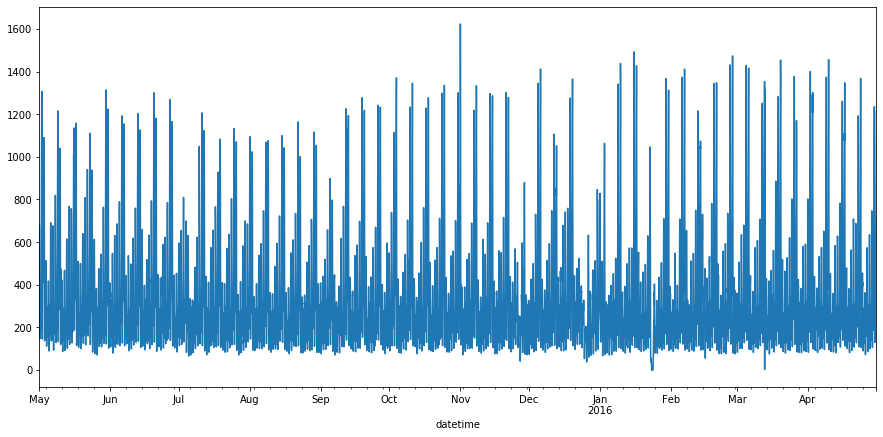

In [100]:
plt.figure(figsize(15,7))
# s['count'].plot()
stmp = s.resample('D').mean()
s['count'].plot();

Курс 5 - Прогнозирование временных рядов  
1-1.Prognozirovanie-vremennyh-ryadov.pdf


dminik5_w1_01

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://habr.com/ru/post/207160/

Основная сложность работы с такими рядами, как в нашем проекте, заключается в том, как учесть сложную структуру сезонности — суточной, недельной и годовой. В рамках моделей ARIMA можно учесть только одну из них. Обычно в таких случаях **сезонность с самым маленьким периодом явно моделируют с помощью аримы, а все остальные учитывают за счёт регрессионной компоненты.**

In [68]:
len(stmp['count'].values)

366

In [78]:
# X_week = []
# ibeg = 0
# for k in range(2, 6):
#     X_week.append([ math.sin(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
#     X_week.append([ math.cos(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
        

In [85]:
atmp = np.array( X_week )
atmp.shape

(8, 366)

In [101]:
X_week = []
ibeg = 0
Kmax = 5
stmp = s
for i in range(ibeg, len(stmp) + ibeg):
    X_week.append([ math.sin(i* 2.*math.pi*k/168) for k in range(2, Kmax+1)] + 
                  [ math.cos(i* 2.*math.pi*k/168) for k in range(2, Kmax+1)])

In [102]:
atmp = np.array( X_week )
atmp.shape

(8784, 8)

In [103]:
lr = LinearRegression()
lr.fit( X_week , stmp['count'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
lr.coef_

array([ 16.65621642, -23.33659136,  12.80854311, -23.88313916,
       -75.23661285,   6.24595665,  -1.69877779, -35.07986357])

In [105]:
lr.intercept_ 

329.05927155604826

In [106]:
lr.score(X_week , stmp['count'].values)

0.07286385180798303